In [1]:
from __future__ import print_function, division   # Python 2/3 compatibility
from skimage import io, img_as_ubyte              # utilities to read and write images in various formats
import numpy as np                                # array manipulation package
import matplotlib.pylab as plt                    # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 16)         # set default figure size
plt.rcParams['image.cmap'] = 'gray'               # set default colormap to gray

# Assignment 2 : Intensity Transformations and Spatial Filtering

The following programming assignment involves two tasks, viz.: basic histogram processing and spatial domain image filtering tasks, i.e., image sharpening.

**Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding the programming assignments, please do not hesitate to contact the course assistant by sending an e-mail at dip@unioulu.oulu.fi. You can also join in for the Q & A session (schedule is given on the course page in Moodle) for this assignment.

**At first, fill in your personal details below.**

# Personal details:

* **Name** Max GARCIA HINOJOSA
* **Contact information:** mgarciah21@student.oulu.fi

# 1. Histogram operations

In the following, you will have to analyze two images, `coffee.jpg` and `pout.tif`, and their histograms, and to compare the results of two histogram operations, namely histogram equalization and stretching. Now, perform the following operations in the reserved code cells and answer to the questions written in **bold** into the reserved spaces in **Finnish or English**.

**1.1. Read and display the images `coffee.jpg` and `pout.tif` and their histograms in the same figure.**

Hint: You can plot the histogram of an image with matplotlib's __[`hist()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)__ function but please note that you have to ravel the pixels of the 2D image into 1D array first.

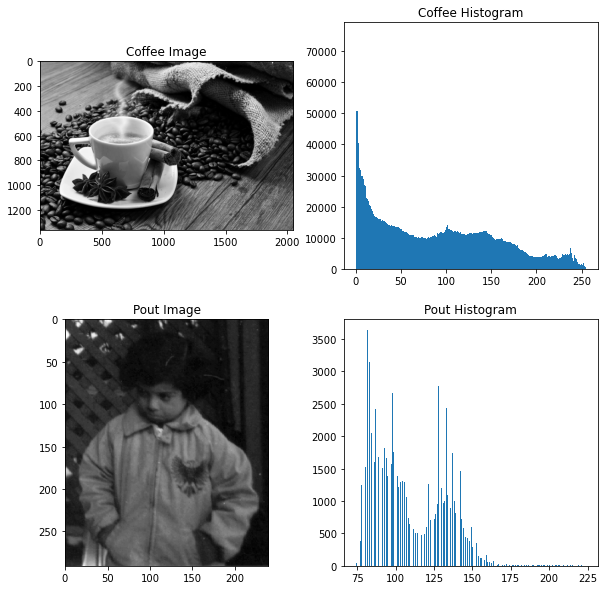

In [2]:
# read the two images
coffee = (io.imread('coffee.jpg', as_gray=True) )  
coffee = img_as_ubyte(coffee)
pout = io.imread('pout.tif')

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Display the coffee image and its histogram
axs[0, 0].imshow(coffee, cmap='gray')
axs[0, 0].set_title('Coffee Image')
axs[0, 1].hist(coffee.ravel(), bins=256)
axs[0, 1].set_title('Coffee Histogram')

# Display the pout image and its histogram
axs[1, 0].imshow(pout, cmap='gray')
axs[1, 0].set_title('Pout Image')
axs[1, 1].hist(pout.ravel(), bins=256)
axs[1, 1].set_title('Pout Histogram')

# Show the plot
plt.show()


**Compare the two images and their histograms. What can you say about the contrast of the images?**

The coffee image has a higher overall brightness than the pout image. This is reflected in the histograms, where the pixel intensities of the coffee image are shifted towards higher values compared to the pout image.

The coffee image has a higher contrast than the pout image. This is evident from the coffee histogram, which has a wider spread of pixel intensities compared to the pout histogram. The wider spread of pixel intensities in the coffee image suggests that it has a greater range of brightness values, which is typically associated with higher contrast.

The pout image has a more uniform distribution of pixel intensities, with a peak around the middle of the histogram. This suggests that the pout image has a lower contrast and a more consistent brightness across the image.

### Histogram equalization

**1.2. Perform histogram equalization with the function __[`exposure.equalize_hist()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist)__ and display the resulting images and their histograms in the same figure.**

Hint: Please note that `exposure.equalize_hist()` function returns `float64` image. You need to __[convert the image back to `uint8`](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after histogram equalization so that the intensity value range of the resulting and original histograms are comparable.

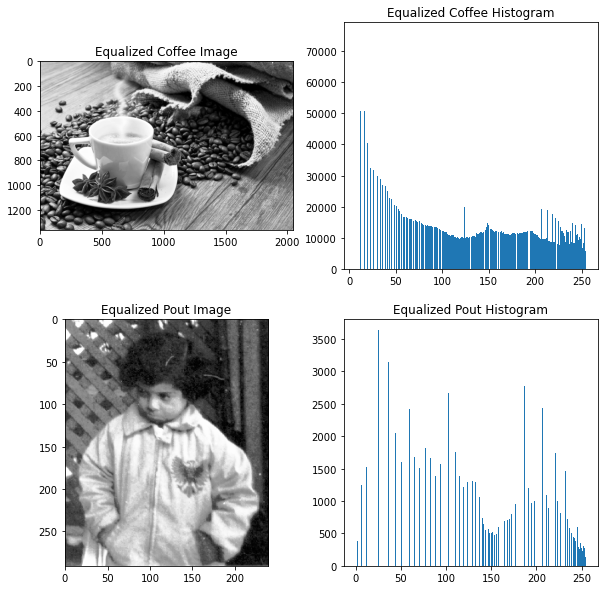

In [4]:
from skimage import exposure
from skimage import img_as_ubyte

import matplotlib.pyplot as plt
from skimage import io, exposure, img_as_ubyte

# Read the two images
coffee = io.imread('coffee.jpg', as_gray=True)
coffee = img_as_ubyte(coffee)
pout = io.imread('pout.tif')

# Perform histogram equalization and convert data type back to uint8
coffee_eq = exposure.equalize_hist(coffee)
coffee_eq = img_as_ubyte(coffee_eq)
pout_eq = exposure.equalize_hist(pout)
pout_eq = img_as_ubyte(pout_eq)

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Display the equalized coffee image and its histogram
axs[0, 0].imshow(coffee_eq, cmap='gray')
axs[0, 0].set_title('Equalized Coffee Image')
axs[0, 1].hist(coffee_eq.ravel(), bins=256)
axs[0, 1].set_title('Equalized Coffee Histogram')

# Display the equalized pout image and its histogram
axs[1, 0].imshow(pout_eq, cmap='gray')
axs[1, 0].set_title('Equalized Pout Image')
axs[1, 1].hist(pout_eq.ravel(), bins=256)
axs[1, 1].set_title('Equalized Pout Histogram')

# Show the plot
plt.show()


**Again, compare the two images. Did histogram equalization help in increasing image contrast? Why or why not?**

Yes, histogram equalization has increased the contrast of both the coffee and pout images. Before equalization, the coffee image had a high brightness but relatively low contrast, while the pout image had a more uniform distribution of pixel intensities. However, after histogram equalization, both images have a wider spread of pixel intensities, resulting in increased contrast.

### Contrast stretching

Another way of improving the contrast in an image is to simply stretch the original pixel values over an extended dynamic range using a linear scaling function. For instance, in case of an `uint8` image, the desired value range of a contrast-stretched image could be the full range from 0 to 255. 

Intuitively, one could perform contrast-stretching by selecting the minimum and maximum values of the original image and map these values to 0 and 255, respectively, and linearly scale all other pixel values in between accordingly. However, even a single outlier pixel value (high or low) can affect the input scaling range too much when outcome of the histogram stretching is not particularly good.

A more robust approach is to map the intensity values so that e.g. 1st and 99th percentiles of the histogram are saturated at the minimum and maximum values of the desired intensity range. In other words, 1% of the pixels of both low and high intensities will be mapped to 0 and 255 in the contrast-stretched image while rest are scaled linearly in between.

**1.3. Now, perform contrast stretching on the original images with the help of functions __[`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)__ and __[`exposure.rescale_intensity()`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity)__ so that the full range from 0 and 255 is utilized based on the 1st and 99th percentiles of their histograms. Then, display the resulting images and their histograms in the same figure.**

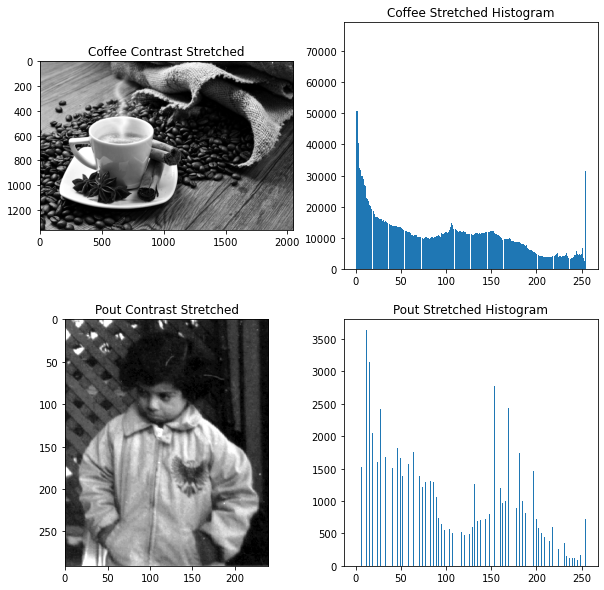

In [6]:
# read the two images
coffee = io.imread('coffee.jpg', as_gray=True)
coffee = img_as_ubyte(coffee)
pout = io.imread('pout.tif')

# find the 1st and 99th percentiles of each image
p1, p99 = np.percentile(coffee, (1, 99))
p1_p, p99_p = np.percentile(pout, (1, 99))

# rescale the intensities of both images to full 'uint8' range [0, 255] based on their 1st and 99th percentiles
coffee_cs = exposure.rescale_intensity(coffee, in_range=(p1, p99), out_range=(0, 255))
pout_cs = exposure.rescale_intensity(pout, in_range=(p1_p, p99_p), out_range=(0, 255))

# display resulting images and their histograms in the same figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].imshow(coffee_cs, cmap='gray')
axs[0, 0].set_title('Coffee Contrast Stretched')
axs[0, 1].hist(coffee_cs.ravel(), bins=256, range=(0, 255))
axs[0, 1].set_title('Coffee Stretched Histogram')

axs[1, 0].imshow(pout_cs, cmap='gray')
axs[1, 0].set_title('Pout Contrast Stretched')
axs[1, 1].hist(pout_cs.ravel(), bins=256, range=(0, 255))
axs[1, 1].set_title('Pout Stretched Histogram')

plt.show()

### Comparison

**1.4. Finally, display the original `coffee.jpg` image, and its histogram-equalized and contrast-stretched versions and the corresponding histograms into one figure (in total six images in one figure). Do the same for `pout.tif` as well.**

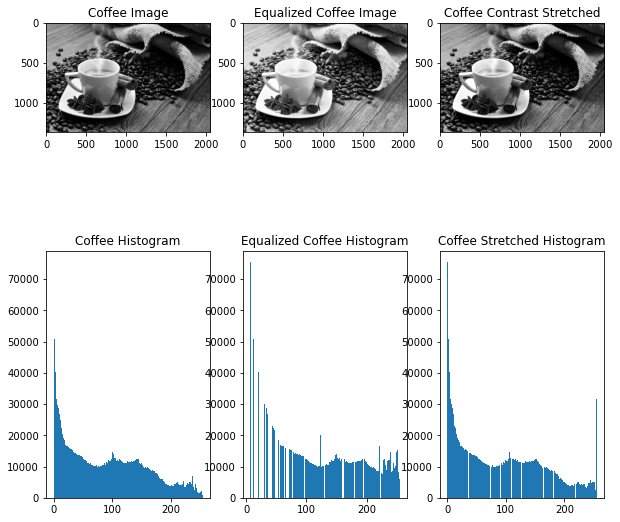

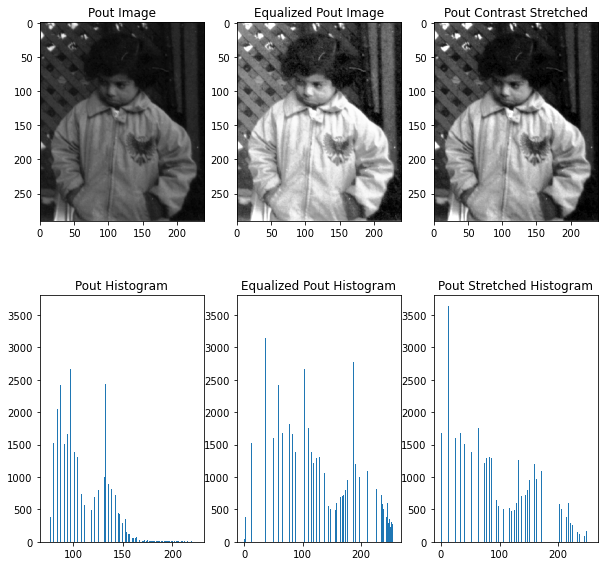

In [16]:
# 6 subplots for 'coffee.jpg'

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Display the coffee image and its histogram
axs[0, 0].imshow(coffee, cmap='gray')
axs[0, 0].set_title('Coffee Image')
axs[1, 0].hist(coffee.ravel(), bins=256)
axs[1, 0].set_title('Coffee Histogram')
axs[0, 1].imshow(coffee_eq, cmap='gray')
axs[0, 1].set_title('Equalized Coffee Image')
axs[1, 1].hist(coffee_eq.ravel(), bins=256)
axs[1, 1].set_title('Equalized Coffee Histogram')
axs[0, 2].imshow(coffee_cs, cmap='gray')
axs[0, 2].set_title('Coffee Contrast Stretched')
axs[1, 2].hist(coffee_cs.ravel(), bins=256, range=(0, 255))
axs[1, 2].set_title('Coffee Stretched Histogram')

# 6 subplots for 'pout.tif'

fig2, axs2 = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Display the coffee image and its histogram
axs2[0, 0].imshow(pout, cmap='gray')
axs2[0, 0].set_title('Pout Image')
axs2[1, 0].hist(pout.ravel(), bins=256)
axs2[1, 0].set_title('Pout Histogram')
axs2[0, 1].imshow(pout_eq, cmap='gray')
axs2[0, 1].set_title('Equalized Pout Image')
axs2[1, 1].hist(pout_eq.ravel(), bins=256)
axs2[1, 1].set_title('Equalized Pout Histogram')
axs2[0, 2].imshow(pout_cs, cmap='gray')
axs2[0, 2].set_title('Pout Contrast Stretched')
axs2[1, 2].hist(pout_cs.ravel(), bins=256, range=(0, 255))
axs2[1, 2].set_title('Pout Stretched Histogram')

plt.show()


**Which method gives better result for each of the two images in** ***your*** **opinion? Why??**

Coffee image: The equalization makes the image too bright, I prefer the Stretched image, it alters the image less.
Pout image: The original image is not very bright, the equalized image increases its contrast and makes it look better.

# 2. Image sharpening

First, read the part concerning sharpening spatial transforms in the lecture notes or in the course book.

In this exercise, your task is to perform a sharpening transform to the image `moonunsharp.tif` in spatial domain enhancing the details, like edges, in the original grayscale image. The use of built-in functions that perform image sharpening from scratch, like `scipy.misc.imfilter()`, is forbidden but functions like __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ can be used for the task. You can select some method presented in the lecture notes or the course book, e.g. use Laplacian operator and convolution, for sharpening the test image. 

Please note that it does not matter what method you use or how “good” the sharpening looks as long as the sharpening can be observed in the end result. An example result achieved with __[`ImageFilter`](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html)__ is shown below:

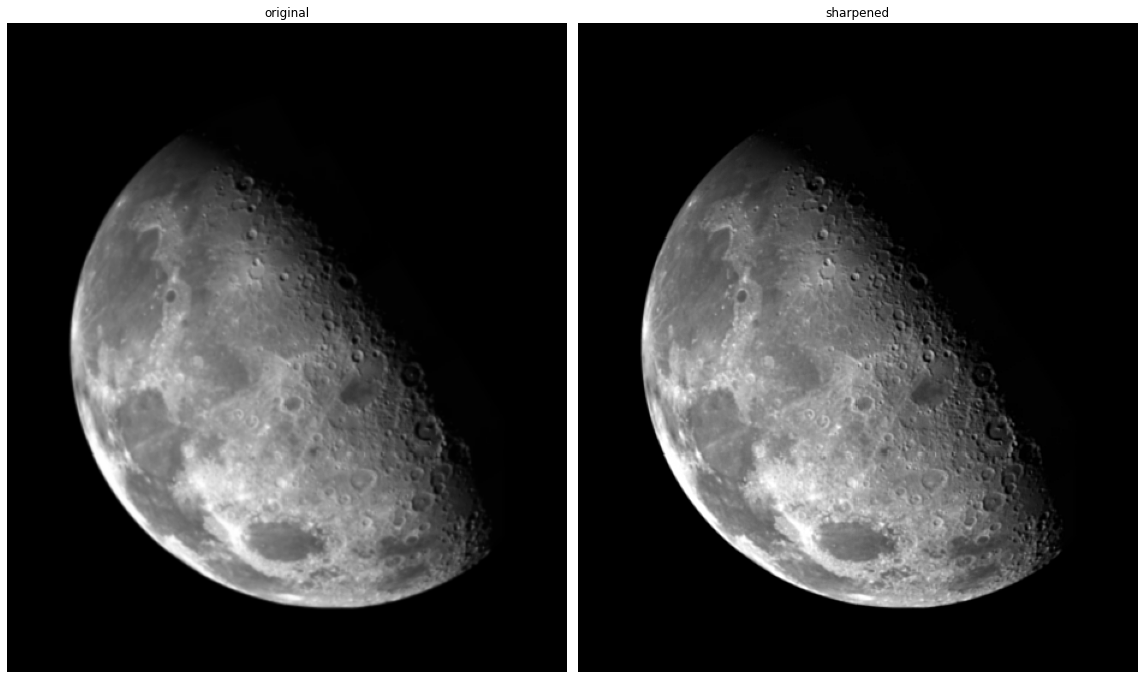

In [7]:
# image sharpening example using 'ImageFilter' module from PILLOW with 'image.filter()' function
from PIL import ImageFilter, Image

moon = Image.open('moonunsharp.tif')
moon_sharp_example = moon.filter(ImageFilter.SHARPEN)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(moon, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(moon_sharp_example, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[1].set_title('sharpened')
ax[1].axis('off')
fig.tight_layout()

**2.1. Now, implement your own image sharpening transform and apply it on the test image.**

Hint: Like in the previous task, please note the __[image data type (`dtype`) and corresponding value range](http://scikit-image.org/docs/dev/user_guide/data_types.html)__ after filtering/sharpening as unexpected errors with arithmetic may occur (see pre-tutorials) !

In [25]:
# Perform image sharpening using e.g. a Laplacian mask and convolution

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.signal import convolve2d

# Load the test image
img = io.imread('moonunsharp.tif')

# Define the Laplacian for sharpening
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])

# Convolve the image with the matrix to perform sharpening
sharpened = convolve2d(img, kernel, mode='same')


**2.2. Display the original and sharpened moon images in the same figure.**

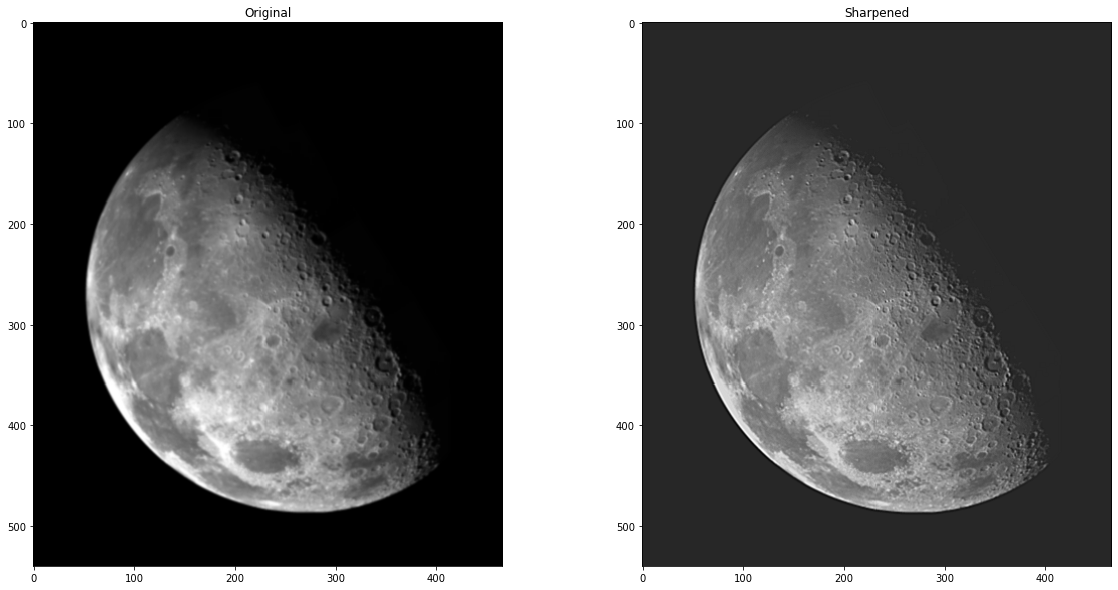

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(sharpened, cmap='gray')
axs[1].set_title('Sharpened')
plt.show()

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

About 3 hours

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

Python documentation is not always very clear. The notebook was quite useful for the second task.